In [100]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

## A little statistics

#### 1:
A) 

The normal distribution is a continuous probability distribution which takes parameters $(\mu,\sigma)$ for its mean and standard deviation respectively. The normal distribution is commonly used in science to represent real-valued random variables with unknown distributions. More importantly though, it is used in the central limit theorem - which states that the mean of many samples of a random variable with any distribution will converge to a normal distribution with sufficient samples.

One important tool used in analyzing the normal distribution is known as the 'z-score', which can tell us how far any measurement we take is from the mean in terms of the standard deviation of the distribution. By knowing the z-score of our measurements, we can calculate how likely it is that our measurement is part of the 'noise' of the distribution, or instead indicates a signal.

B) 

We'll try several Z values to see the relation between the cumulative distribution and z-score values.

In [188]:
print("Z-Score:", 0, "; cumulative distribution: " , stats.norm.cdf(0))
print("Z-Score:", -1, "; cumulative distribution: " , np.round(stats.norm.cdf(-1), 3))
print("Z-Score:", 2, "; cumulative distribution: " , np.round(stats.norm.cdf(2), 3))

Z-Score: 0 ; cumulative distribution:  0.5
Z-Score: -1 ; cumulative distribution:  0.159
Z-Score: 2 ; cumulative distribution:  0.977


As we can see, cdf does indeed give values consistent with the [z-score table](https://en.wikipedia.org/wiki/Standard_normal_table).

C) 

In [199]:
print('Probability:', 0.5, "Z-Score: ", np.round(stats.norm.ppf(0.5),3))
print('Probability:', 0.841, "Z-Score: ", np.round(stats.norm.ppf(0.841),3))
print('Probability:', 0.977, "Z-Score: ", np.round(stats.norm.ppf(0.977),3))
print('Probability:', 0.159, "Z-Score: ", np.round(stats.norm.ppf(0.159),3))

Probability: 0.5 Z-Score:  0.0
Probability: 0.841 Z-Score:  0.999
Probability: 0.977 Z-Score:  1.995
Probability: 0.159 Z-Score:  -0.999


D) 

Minus signs appear for any probability plugged into the ppf which is less than 0.5. This makes sense, as the ppf function outputs z-scores, which are the number of standard deviations away from the mean (ie. z-score is zero at the mean). Thus, if we plug in a probability which is one standard deviation less than the mean, we would expect ppf to output a z-score of -1.

#### 2: 

A) The exponential distribution is a continuous probability distribution of the time between events in a process where events occur continuously and independently at a constant average rate. This distribution is particularly useful for estimating the amount of time it will take before the next event in a process - such as how many days you might expect before the next rainy day. 

PDF: $$\lambda*e^{-\lambda x}$$

CDF: $$1-e^{-\lambda x}$$

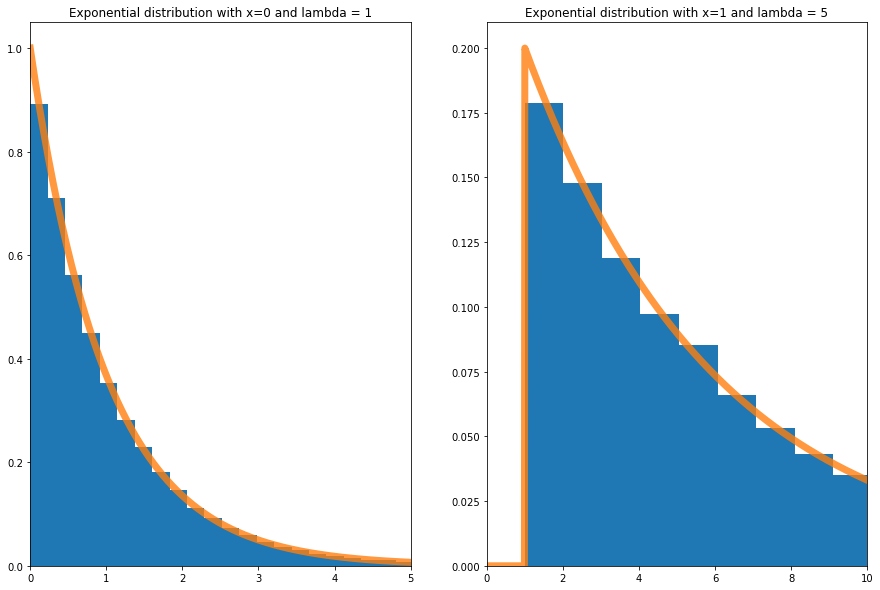

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2)

exp_d1 = stats.expon.rvs(loc = 0, scale = 1, size = 100000)
exp_d2 = stats.expon.rvs(loc = 1, scale = 5, size = 10000)

ax1.hist(exp_d1,50, density=True)
ax2.hist(exp_d2,50, density=True)

x = np.linspace(0,10,1000)
x2 = np.linspace(0,10,1000)
ax1.plot(x, stats.expon.pdf(x), linewidth = 7, alpha = 0.8)
ax2.plot(x, stats.expon.pdf(x2, loc = 1, scale = 5), linewidth = 7, alpha = 0.8)

ax1.title.set_text('Exponential distribution with x=0 and lambda = 1')
ax2.title.set_text('Exponential distribution with x=1 and lambda = 5')

ax1.set_xlim([0,5])
ax2.set_xlim([0,10])
plt.show()

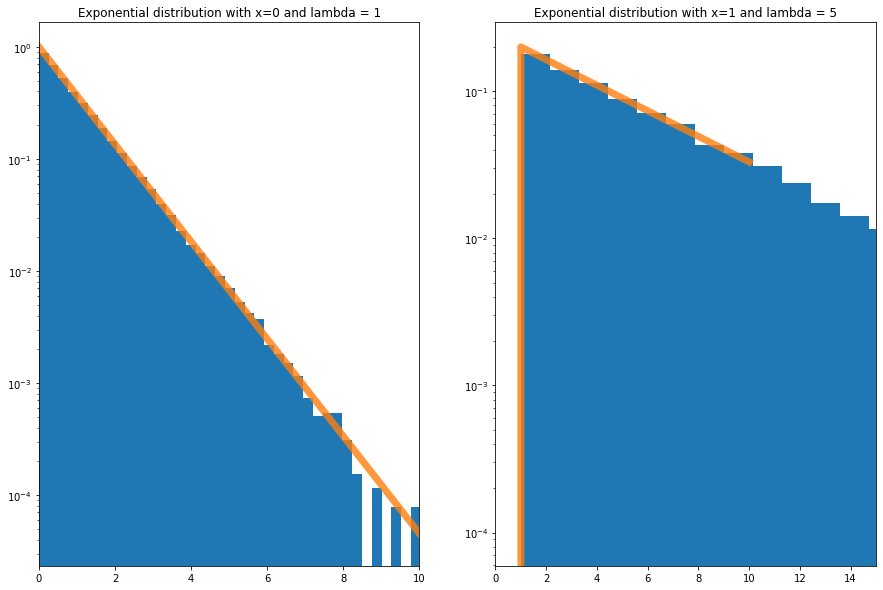

In [148]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(exp_d1,50, density = True)
ax2.hist(exp_d2,50, density = True)

ax1.semilogy(x, stats.expon.pdf(x), linewidth = 7, alpha = 0.8)
ax2.semilogy(x2, stats.expon.pdf(x2, loc = 1, scale = 5), linewidth = 7, alpha = 0.8)

ax1.set_xlim([0,10])
ax2.set_xlim([0,15])

ax1.title.set_text('Exponential distribution with x=0 and lambda = 1')
ax2.title.set_text('Exponential distribution with x=1 and lambda = 5')
plt.show()

3A) Suppose I record the number of days it takes between rainy days in Seattle in the spring, and find that it took five days between the last two rainy days.

3B) What is the probability that it takes 5 or fewer days before the next rainy day, assuming that on average one in three days are rainy during spring in Seattle?

3C) $$\int_{0}^{5} \frac{1}{3}e^{-\frac{1}{3}x}dx$$

In [216]:
print("D) Probability that background produced signal: " , np.round(stats.expon.cdf(5, scale=3),3))
print("E) Z-score of above probability: ", np.round(stats.expon.ppf(stats.expon.cdf(5, scale=3)),3))

D) Probability that background produced signal:  0.811
E) Z-score of above probability:  1.667


4) Suppose that we wanted to see how the lambda parameter (rate of rainy days) effects the liklihood of consecutive rainy days:

In [217]:
print("1: One in two days are rainy, two rainy days within 5.5 days of eachother " , stats.expon.cdf(5.5, scale=2))
print("2: One in six days are rainy, two rainy days within 5.5 days of eachother " , stats.expon.cdf(5.5, scale=6))
print("3: One in ten days are rainy, two rainy days within 5.5 days of eachother " , stats.expon.cdf(5.5, scale=10))
print("4: One in fifty days are rainy, two rainy days within 5.5 days of eachother " , stats.expon.cdf(5.5, scale=50))
print("5: One in two days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=2))
print("6: One in six days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=6))
print("7: One in ten days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=10))

1: One in two days are rainy, two rainy days within 5.5 days of eachother  0.9360721387932924
2: One in six days are rainy, two rainy days within 5.5 days of eachother  0.6001503456551527
3: One in ten days are rainy, two rainy days within 5.5 days of eachother  0.42305018961951335
4: One in fifty days are rainy, two rainy days within 5.5 days of eachother  0.10416586470347174
5: One in two days are rainy, two consecutive rainy days  0.3934693402873666
6: One in six days are rainy, two consecutive rainy days  0.15351827510938593
7: One in ten days are rainy, two consecutive rainy days  0.09516258196404044


It seems that for an exponential function, the ratio between x and lambda determines the probability of an event. Take lines 4 and 7 or 3 and 5 as examples from above. In both cases, the ratio of x/lambda is identical, and the probabilities returned by the cdf are identical. Furthermore, as lambda decreases or x increases, the probability decreases (and the opposite is also true).

Because the exponential distribution is continuous, fractional rainy days should also be considered (ie. If it begins raining 36 hours after the last rainy day, this is different than if it begins raining 24 hours after the last rainy day). Thus, we also examine what happens when x is not whole.

## Non-continuous distributions

1A) The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events $k$ occuring in a fixed interval of time or space if these events occur with a known constant mean rate $\lambda$ and are independent of the time since the last event. 

The distribution has a probability mass function: 
$$f(k;\lambda) = \frac{\lambda^ke^{-\lambda}}{k!}$$

The Cumulative Density Function for the Poisson Distribution is: 
$$e^{-\lambda}\sum_{i=0}^{\lfloor k \rfloor}\frac{\lambda^i}{i!}$$

1B)

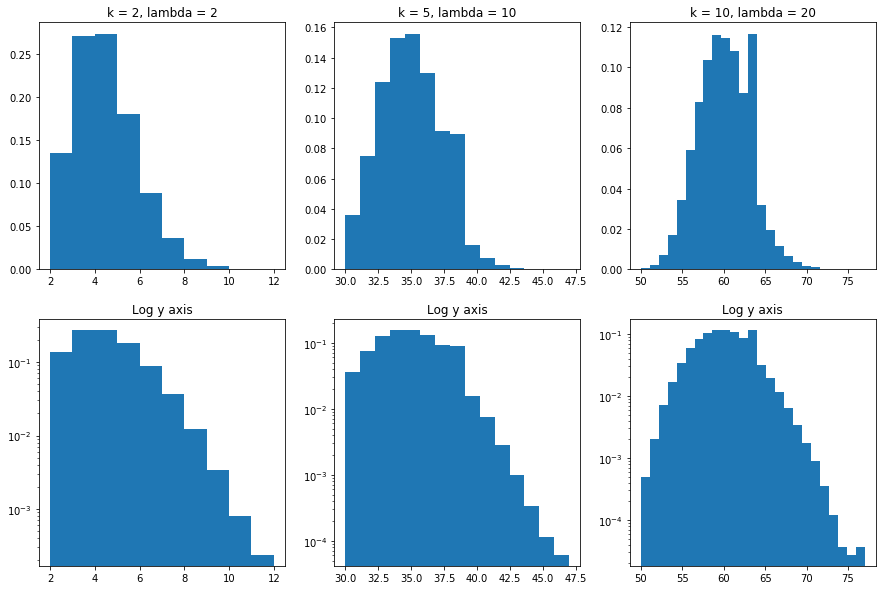

In [178]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)

pois_d1 = stats.poisson.rvs(2, 2, size=100000)
pois_d2 = stats.poisson.rvs(5, 10, size=100000)
pois_d3 = stats.poisson.rvs(10, 20, size=100000)
x = np.linspace(0,20,20)

ax1.hist(pois_d1, bins=10, density=True)
ax1.title.set_text('k = 2, lambda = 2')
ax2.hist(pois_d2, bins=15, density=True)
ax2.title.set_text('k = 5, lambda = 10')
ax3.hist(pois_d3, bins=25, density=True)
ax3.title.set_text('k = 10, lambda = 20')

ax4.hist(pois_d1, bins=10, density=True, log=True)
ax4.title.set_text('Log y axis')
ax5.hist(pois_d2, bins=15, density=True, log=True)
ax5.title.set_text('Log y axis')
ax6.hist(pois_d3, bins=25, density=True, log=True)
ax6.title.set_text('Log y axis')

As we increase the number of occurences, the mean of the distribution increases, whereas if we increase lambda, the variance of the distribution increases. Interestingly, when both k and lambda are sufficiently high, the distribution begins to resemble a binomial distribution.

C)

Suppose I receive four letters per day on average. What is the probability that I will receive exactly 6 letters one particular day?

In [184]:
prob = stats.poisson.pmf(6, 4)
print('Probability of receiving 6 letters in one day: ', np.round(prob,3))

Probability of receiving 6 letters in one day:  0.104


D) Probabilities returned by the Poisson distribution are discrete. This makes sense, as (using the example above) I cannot receive a fractional number of letters in a day.

E) The parameters (such as lambda) for a Poisson distribution are continuous, this is straightforward enough as the function for calculating the mean is continuous. Thus standard deviation should also be continuous - although parameters such as the median or mode would not be, as individual outputs of the distribution must still be discrete.